# Retail Sales

In [1]:
import numpy as np
import pandas as pd
import requests, zipfile, io
import re
import os

In [2]:
%load_ext autoreload
%autoreload 2
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 200)

data_dir = '../data'
cache_dir = os.path.join(data_dir, 'cache')
import sys
sys.path.append('..')

from opencanada.statscan import StatscanZip

In [3]:
retail_sales_dataset = StatscanZip('https://www150.statcan.gc.ca/n1/tbl/csv/20100072-eng.zip')
retail_sales = retail_sales_dataset.get_data()
retail_sales.index = pd.to_datetime(retail_sales.index)
for col in ['Electronic shopping and mail-order houses','Retail E-commerce sales','Retail trade']:
    retail_sales[col] = retail_sales[col] / 1000000

Extracting files to C:\Users\dwight\.canadadata\repo\extracted\20100072
Extracting files to C:\Users\dwight\.canadadata\repo\extracted\20100072


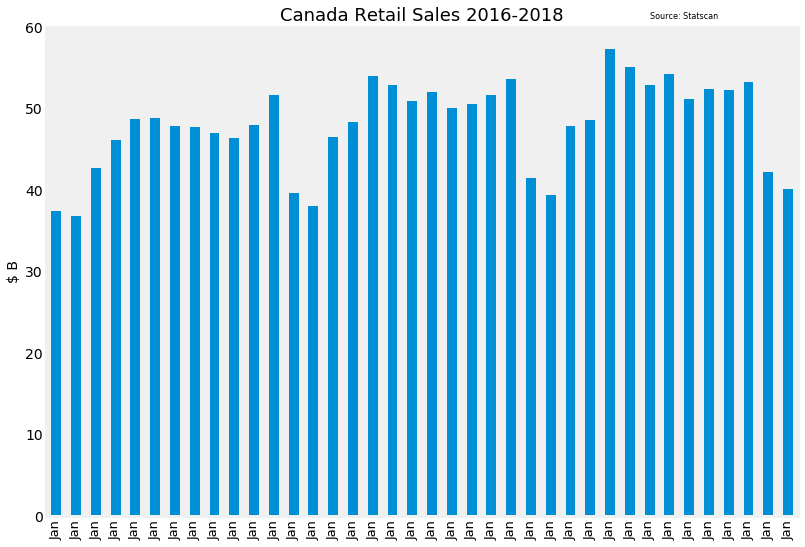

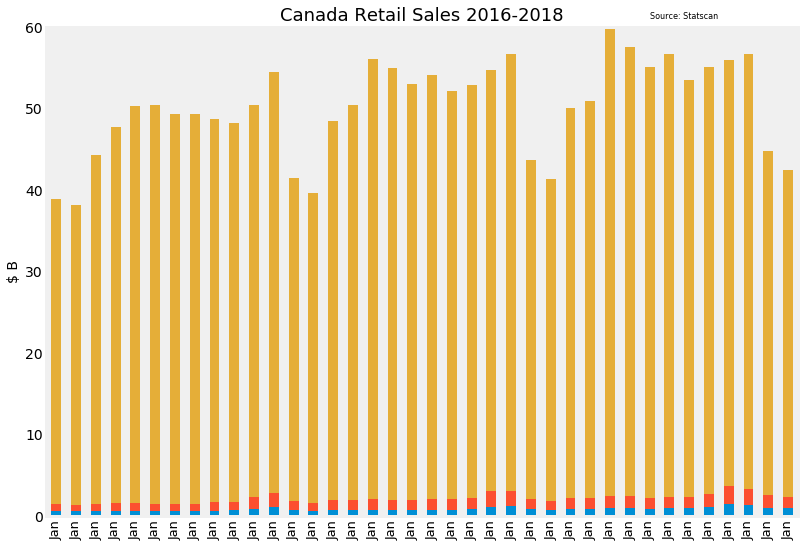

In [4]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import rcParams

style.use('fivethirtyeight')
%matplotlib inline

def retail_chart():
    ax = retail_sales[['Retail trade']].plot.bar(figsize=(12,9), stacked=True, grid=False, label=False, legend=False)
    ax.set_xticklabels(retail_sales.index.strftime('%b').tolist(), fontsize=13);
    ax.set_title('Canada Retail Sales 2016-2018', fontsize=18)
    ax.set_xlabel('');
    ax.set_ylabel('$ B', fontsize=14);
    ax.yaxis.set_tick_params(labelsize=14)
    ax.text(x=30, y=61, s='Source: Statscan',fontsize=8)
    ax.set_ylim((0,60))
    
def retail_sales_by_source():
    ax = retail_sales.plot.bar(figsize=(12,9), stacked=True, grid=False, label=False, legend=False)
    ax.set_xticklabels(retail_sales.index.strftime('%b').tolist(), fontsize=13);
    ax.set_title('Canada Retail Sales 2016-2018', fontsize=18)
    ax.set_xlabel('');
    ax.set_ylabel('$ B', fontsize=14);
    ax.yaxis.set_tick_params(labelsize=14)
    ax.text(x=30, y=61, s='Source: Statscan',fontsize=8)
    ax.set_ylim((0,60))

retail_chart()
retail_sales_by_source()

In [5]:
retail_sales

,REF_DATE,GEO,Electronic shopping and mail-order houses,Retail E-commerce sales,Retail trade
1970-01-01 00:00:00.000000000,2016-01,Canada,0.679612,0.877354,37.415147
1970-01-01 00:00:00.000000001,2016-02,Canada,0.616598,0.789553,36.815980
1970-01-01 00:00:00.000000002,2016-03,Canada,0.681191,0.865677,42.763737
1970-01-01 00:00:00.000000003,2016-04,Canada,0.686764,0.916710,46.155952
1970-01-01 00:00:00.000000004,2016-05,Canada,0.681192,0.916244,48.783412
1970-01-01 00:00:00.000000005,2016-06,Canada,0.664582,0.896826,48.892480
1970-01-01 00:00:00.000000006,2016-07,Canada,0.656449,0.874358,47.842336
1970-01-01 00:00:00.000000007,2016-08,Canada,0.664165,0.916180,47.790528
1970-01-01 00:00:00.000000008,2016-09,Canada,0.706048,1.016196,47.059911
1970-01-01 00:00:00.000000009,2016-10,Canada,0.753835,1.067243,46.455078
